In [13]:
#Excercise 
#Krishna Shah

In [2]:
from google.colab import drive
drive.mount("/content/drive")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

Mounted at /content/drive


In [5]:
car_data = pd.read_csv("/content/drive/MyDrive/ML_Lab1/ML_Lab2/Exercise-CarData.csv")
print("\nData :\n", car_data)

print("\nData statistics\n", car_data.describe())
X = car_data.iloc[:, :-1].values 
Y = car_data.iloc[:, -1].values 

print("\n\nInput\n", X) 
print("\n\nOutput\n", Y) 

X_new = car_data.iloc[:, 2:6].values
print("\nTransformation\n", X_new)


Data :
       Unnamed: 0  Price   Age     KM  ... Automatic    CC  Doors  Weight
0              0  13500  23.0  46986  ...         0  2000  three    1165
1              1  13750  23.0  72937  ...         0  2000      3    1165
2              2  13950  24.0  41711  ...         0  2000      3    1165
3              3  14950  26.0  48000  ...         0  2000      3    1165
4              4  13750  30.0  38500  ...         0  2000      3    1170
...          ...    ...   ...    ...  ...       ...   ...    ...     ...
1431        1431   7500   NaN  20544  ...         0  1300      3    1025
1432        1432  10845  72.0     ??  ...         0  1300      3    1015
1433        1433   8500   NaN  17016  ...         0  1300      3    1015
1434        1434   7250  70.0     ??  ...         0  1300      3    1015
1435        1435   6950  76.0      1  ...         0  1600      5    1114

[1436 rows x 11 columns]

Data statistics
         Unnamed: 0         Price  ...           CC      Weight
count  1

In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = "mean")
imputer = imputer.fit(X[:, [2, 6]])
print(f"\nImputer :- {imputer}")

X[:, [2, 6]] = imputer.transform(X[:, [2, 6]])
print(f"\n\nX is :- {X}")

imputer = SimpleImputer(missing_values = np.nan, strategy = "most_frequent")

imputer = imputer.fit(X[:, [4, 9]])
print(f"\n\nImputer :- {imputer}")

X[:, [4, 9]] = imputer.transform(X[:, [4, 9]])
print(f"\n\nX is :- {X}")


Imputer :- SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)


X is :- [[0 13500 23.0 ... 0 2000 'three']
 [1 13750 23.0 ... 0 2000 '3']
 [2 13950 24.0 ... 0 2000 '3']
 ...
 [1433 8500 55.67215568862275 ... 0 1300 '3']
 [1434 7250 70.0 ... 0 1300 '3']
 [1435 6950 76.0 ... 0 1600 '5']]


Imputer :- SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)


X is :- [[0 13500 23.0 ... 0 2000 'three']
 [1 13750 23.0 ... 0 2000 '3']
 [2 13950 24.0 ... 0 2000 '3']
 ...
 [1433 8500 55.67215568862275 ... 0 1300 '3']
 [1434 7250 70.0 ... 0 1300 '3']
 [1435 6950 76.0 ... 0 1600 '5']]


In [9]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

X_temp = X[:, [1, 2, 6, 7, 8]]
scaler = MinMaxScaler()

scaled_x = scaler.fit_transform(X_temp)
print(f"\n\nScaled _x :- {scaled_x}")

stad = StandardScaler()
std_x = stad.fit_transform(scaled_x)
print(f"\n\nstandard x :- {std_x}")



Scaled _x :- [[0.3250444  0.27848101 1.         0.         1.        ]
 [0.3339254  0.27848101 1.         0.         1.        ]
 [0.3410302  0.29113924 0.67496112 0.         1.        ]
 ...
 [0.14742451 0.6920526  0.         0.         0.        ]
 [0.10301954 0.87341772 1.         0.         0.        ]
 [0.09236234 0.94936709 0.         0.         0.42857143]]


standard x :- [[ 7.63762679e-01 -1.82280225e+00  7.33305621e-01 -2.42893084e-01
   2.31497633e+00]
 [ 8.32714853e-01 -1.82280225e+00  7.33305621e-01 -2.42893084e-01
   2.31497633e+00]
 [ 8.87876592e-01 -1.76701156e+00  0.00000000e+00 -2.42893084e-01
   2.31497633e+00]
 ...
 [-6.15280799e-01 -4.89326897e-16 -1.52274947e+00 -2.42893084e-01
  -1.42599356e+00]
 [-9.60041669e-01  7.99360384e-01  7.33305621e-01 -2.42893084e-01
  -1.42599356e+00]
 [-1.04278428e+00  1.13410455e+00 -1.52274947e+00 -2.42893084e-01
   1.77279249e-01]]


In [10]:
from sklearn import preprocessing

label_encode = preprocessing.LabelEncoder()
X[ : , 4] = label_encode.fit_transform(X[ : ,4])
X[ : , 9] = label_encode.fit_transform(X[ : ,9])

duplicate_data = pd.get_dummies(car_data['Doors'])
# print(f"\n\nDuplicate Data :- {duplicate_data}")
car_data = car_data.drop(['Doors', ], axis = 1)
car_data = pd.concat([duplicate_data, car_data], axis = 1)

diplicate_data = pd.get_dummies(car_data['FuelType'])
# print(f"\n\nDuplicate Data :- {duplicate_data}")
car_data = car_data.drop(['FuelType',], axis = 1)
car_data = pd.concat([duplicate_data, car_data], axis = 1)

print("\n\nLast Data Heads \n",car_data.head(20))
print("\n\nLast Data Tails \n",car_data.tail(20))



Last Data Heads 
     2  3  4  5  five  four  ...     KM    HP  MetColor  Automatic    CC  Weight
0   0  0  0  0     0     0  ...  46986    90       1.0          0  2000    1165
1   0  1  0  0     0     0  ...  72937    90       1.0          0  2000    1165
2   0  1  0  0     0     0  ...  41711    90       NaN          0  2000    1165
3   0  1  0  0     0     0  ...  48000    90       0.0          0  2000    1165
4   0  1  0  0     0     0  ...  38500    90       0.0          0  2000    1170
5   0  1  0  0     0     0  ...  61000    90       0.0          0  2000    1170
6   0  1  0  0     0     0  ...     ??  ????       NaN          0  2000    1245
7   0  1  0  0     0     0  ...  75889    90       1.0          0  2000    1245
8   0  1  0  0     0     0  ...  19700   192       0.0          0  1800    1185
9   0  1  0  0     0     0  ...  71138  ????       NaN          0  1900    1105
10  0  1  0  0     0     0  ...  31461   192       0.0          0  1800    1185
11  0  1  0  0     0



Data :-       Unnamed: 0  Price   Age     KM  ... Automatic    CC  Doors  Weight
0              0  13500  23.0  46986  ...         0  2000  three    1165
1              1  13750  23.0  72937  ...         0  2000      3    1165
2              2  13950  24.0  41711  ...         0  2000      3    1165
3              3  14950  26.0  48000  ...         0  2000      3    1165
4              4  13750  30.0  38500  ...         0  2000      3    1170
...          ...    ...   ...    ...  ...       ...   ...    ...     ...
1431        1431   7500   NaN  20544  ...         0  1300      3    1025
1432        1432  10845  72.0     ??  ...         0  1300      3    1015
1433        1433   8500   NaN  17016  ...         0  1300      3    1015
1434        1434   7250  70.0     ??  ...         0  1300      3    1015
1435        1435   6950  76.0      1  ...         0  1600      5    1114

[1436 rows x 11 columns]




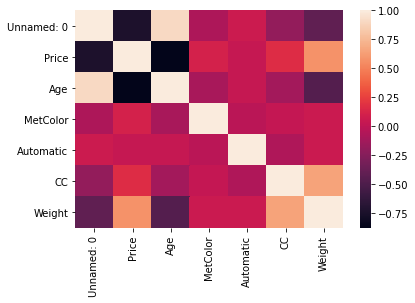

In [15]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import matplotlib.pyplot as plt

data_corr = pd.read_csv('/content/drive/MyDrive/ML_Lab1/ML_Lab2/Exercise-CarData.csv')

print(f"\n\nData :- {data_corr}\n\n")

corr = data_corr.corr()
corr.head()
sns.heatmap(corr)
plt.show()
